In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('/Users/h.tatsuhiro/PycharmProjects/GCI2021Winter/Competition1/data/train.csv')
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
y = df.Perished
X = df.drop(['Perished'], axis=1)

In [18]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Perished, dtype: int64

In [19]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
import matplotlib.pyplot as plt

In [21]:
X = X.drop(['Ticket', 'Name'], axis=1)

In [22]:
cat_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [23]:
cat_cols

['Sex', 'Cabin', 'Embarked']

In [24]:
num_cols

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [25]:
missing_nums = [cname for cname in num_cols if X[cname].isnull().any()]
missing_cats = [cname for cname in cat_cols if X[cname].isnull().any()]
print(missing_cats)
print(missing_nums)

['Cabin', 'Embarked']
['Age']


In [38]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_std_pre = X[num_cols]
X_std = Scaler.fit_transform(X_std_pre)
X_std

array([[-1.73010796,  0.82737724, -0.53037664,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.72622007, -1.56610693,  0.57183099,  0.43279337, -0.47367361,
         0.78684529],
       [-1.72233219,  0.82737724, -0.25482473, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 1.72233219,  0.82737724,         nan,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.72622007, -1.56610693, -0.25482473, -0.4745452 , -0.47367361,
        -0.04438104],
       [ 1.73010796,  0.82737724,  0.15850313, -0.4745452 , -0.47367361,
        -0.49237783]])

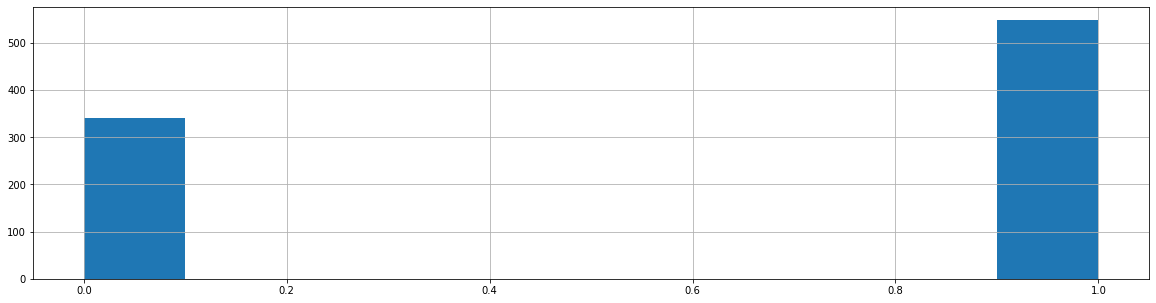

In [39]:
plt.figure(figsize=(20, 5))
plt.hist(y)
plt.grid(True)

In [27]:
for cname in cat_cols:
    print(cname + str(X[cname].nunique()))

Sex2
Cabin147
Embarked3


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [ ]:
aa